In [6]:
suppressMessages(here::i_am('R_analysis/notebooks/Fig3_climate_impacts.ipynb'))
CODE = here::here()
source(glue::glue("{CODE}/R_analysis/init.R"))

In [7]:
# Load functions
local_load('figures/climate_impacts.R')
# Load arguments
local_load('analysis/main_analysis_args.R')

In [15]:
plot_df = generate_climate_impacts_plot_df(
    year_min, year_max,
    growing_season_min, growing_season_max,
    GDD_lower, KDD_lower_list,
    temp_lower, temp_upper
)

In [19]:
plot_df |> write_feather(glue("{CODE}/results/intermediate/climate_impacts.feather"))

In [4]:
plot_df = read_feather(glue("{CODE}/results/intermediate/climate_impacts.feather"))

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


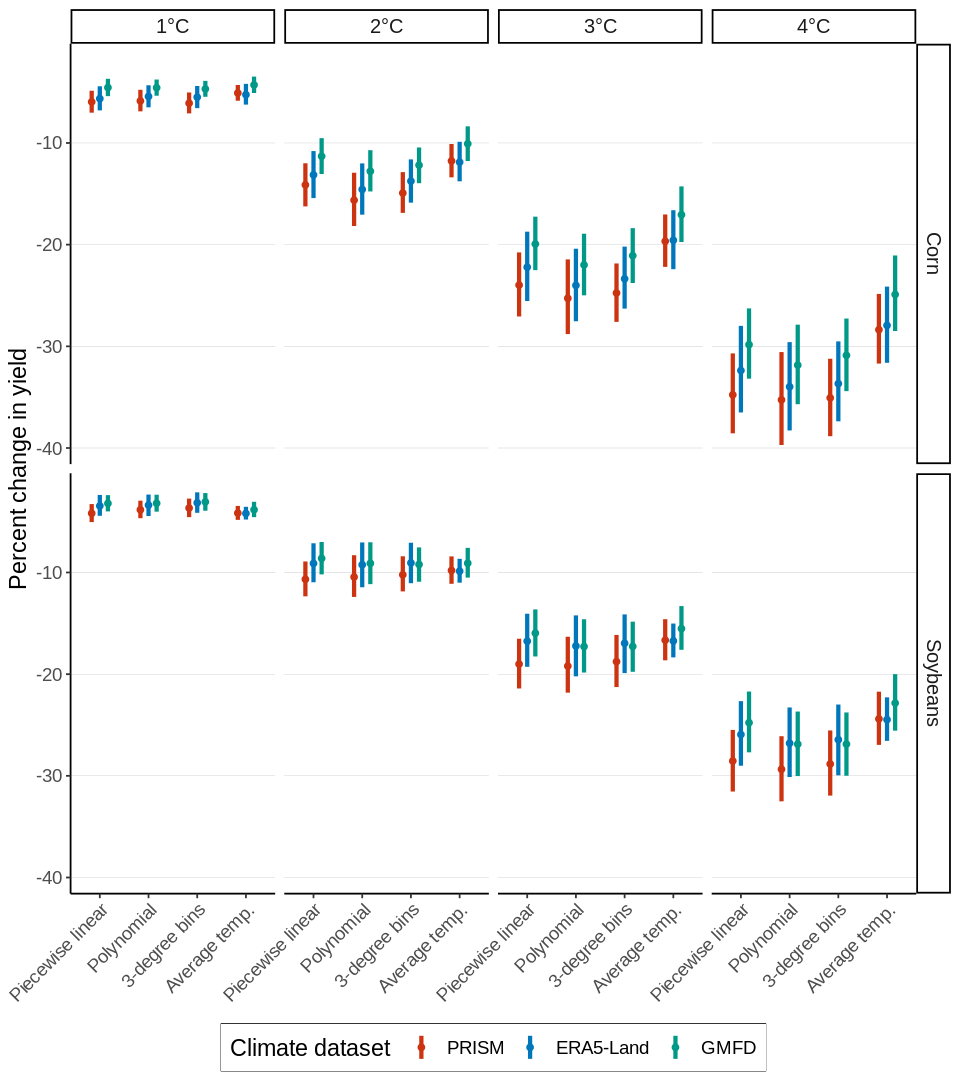

In [5]:
options(repr.plot.width=8, repr.plot.height=9)
plot = plot_climate_impacts(plot_df)
plot

In [6]:
ggsave(glue("{CODE}/results/figures/Fig3_climate_impacts.pdf"), plot, width=8, height=9)

## County-level impact Map

In [6]:
plot_df = generate_climate_impacts_plot_df(
    year_min, year_max,
    growing_season_min, growing_season_max,
    GDD_lower, KDD_lower_list,
    temp_lower, temp_upper,
    aggregate=FALSE, t_list = c(2),
    num_iterations=0, spec_list = c('piecewise')
)

In [7]:
plot_df |> write_feather(glue("{CODE}/results/intermediate/climate_impacts_fips.feather"))

In [2]:
plot_df = read_feather(glue("{CODE}/results/intermediate/climate_impacts_fips.feather"))

In [3]:
plot_df |>
    filter(source=='prism', spec=='piecewise') |>
    select(fips, crop) |>
    distinct()  |>
    count(crop) |>
    mutate(share = n/3143)
    

crop,n,share
<chr>,<int>,<dbl>
corn,2291,0.7289214
soy,2008,0.6388801


In [4]:
shp_dir = '/home3/dth2133/data/shapefiles/county/cb_2018_us_county_500k.shp'

Reading layer `cb_2018_us_county_500k' from data source 
  `/home3/dth2133/data/shapefiles/county/cb_2018_us_county_500k.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 3233 features and 9 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -179.1489 ymin: -14.5487 xmax: 179.7785 ymax: 71.36516
Geodetic CRS:  NAD83


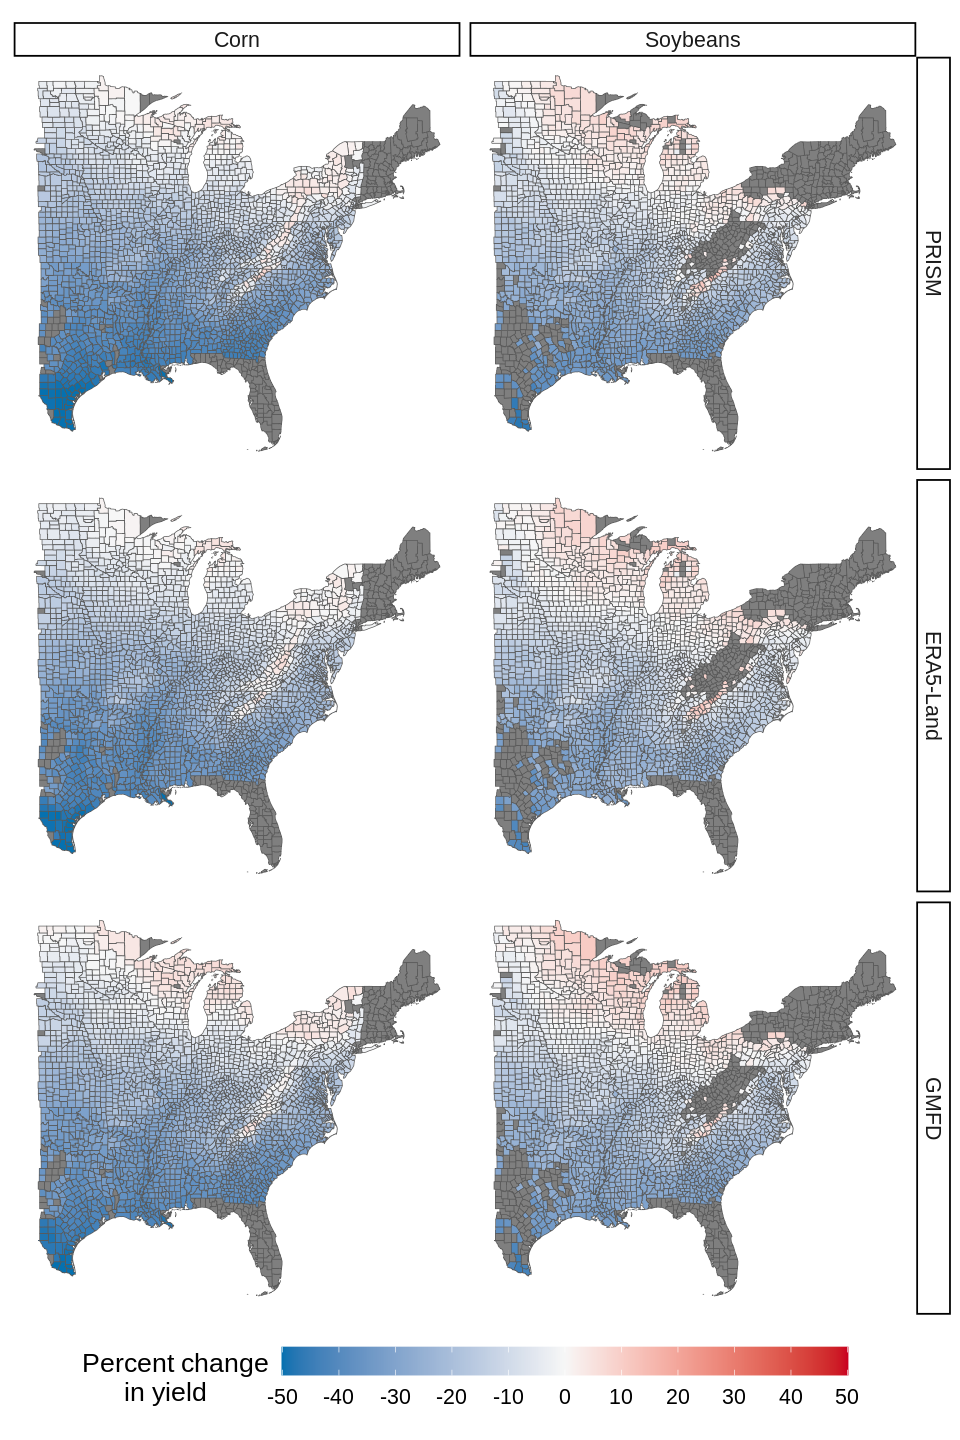

In [8]:
options(repr.plot.width = 8, repr.plot.height = 12)
plot = plot_climate_map(plot_df, shp_dir)
plot

In [60]:
ggsave(glue("{CODE}/results/figures/SI_climate_impact_map.png"), plot, width=8, height=12)

In [59]:
# Mean and IQR of absolute differences
plot_df |> 
    pivot_wider(names_from='source', values_from='impact2') |>
    mutate(
        era5_diff = abs(prism - era5)*100,
        gmfd_diff = abs(prism - gmfd)*100
    ) |>
    select(crop, contains('diff')) |>
    group_by(crop) |>
    summarize(
        across(
            where(is.numeric), 
            list(
                mean = ~ mean(.x), 
                ub = ~ quantile(.x, 0.75),
                lb = ~ quantile(.x, 0.25)
            )
        ),
        .groups = 'drop'
    )
    

crop,era5_diff_mean,era5_diff_ub,era5_diff_lb,gmfd_diff_mean,gmfd_diff_ub,gmfd_diff_lb
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
corn,2.497360,3.583827,0.8518955,2.886524,4.007301,1.6459440
soy,2.784199,4.131663,0.8914586,2.085348,2.960145,0.9543595
